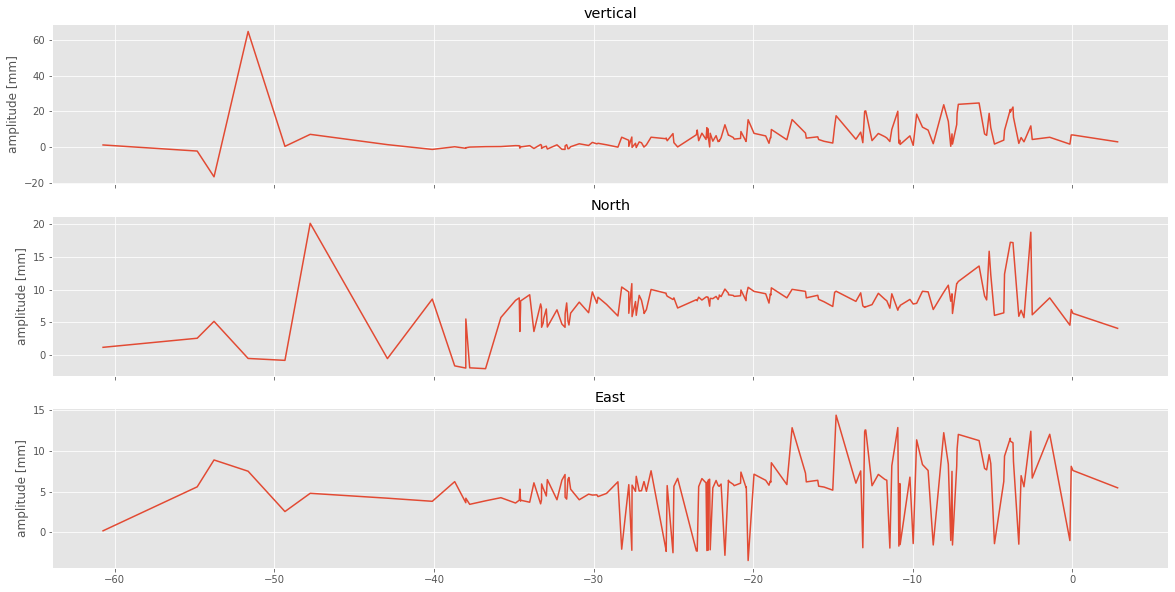

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from salvus.flow import api, simple_config
from salvus.mesh import simple_mesh
# -

# ## Load data and validate receiver locations

# +
file = "../gps_stations/with_LoadDef/Observed_OTL-induced_Displacements_M2.txt"
with open(file, "r") as f:
    header = f.readline()
    
headers = header[:-1].split(" | ")

stations = pd.read_csv(file,
   skiprows=1,
   header=None,
   names=headers,
   delimiter=' ',
   skipinitialspace=True,
)
stations
# -

recs = [
    simple_config.receiver.seismology.SideSetPoint3D(
        latitude=lat,
        longitude=lon,
        depth_in_m=0.0,
        radius_of_sphere_in_m=6371000.0,
        side_set_name="r1",
        network_code="",
        station_code=name,
        location_code="",
        fields=["velocity"],
    )
    for name, lat, lon in zip(
        stations['Station'], 
        stations['Lat(+N,deg)'], 
        stations['Lon(+E,deg)']
    )
]


# +
def cmp2str(c):
    if c == "V":
        return "vertical"
    if c == "N":
        return "North"
    if c == "E":
        return "East"
    
    raise ValueError("`c` must be one of ['V', 'N', 'E']")

fig, ax = plt.subplots(3,1, sharex=True, figsize=[20,10])


deg = stations[f"Lat(+N,deg)"]
idx = np.argsort(deg)
deg = deg[idx]

ref = {}
for _i, cmp in enumerate(["V", "N", "E"]): #completely different phases of measurements?
    ref[cmp] = stations[f"{cmp}-Amp(mm)"] * (90 - stations[f"{cmp}-Pha(deg)"])/ 90 # QUESTION HERE
    ref[cmp] = ref[cmp][idx]
    
for _i, cmp in enumerate(["V", "N", "E"]):    
    ax[_i].plot(deg,ref[cmp])
    ax[_i].set_ylabel("amplitude [mm]")
    ax[_i].set_title(cmp2str(cmp))

plt.show()

In [29]:
np.max(90 - stations[f"{cmp}-Pha(deg)"])

269.68193551

In [28]:
stations[f"{cmp}-Amp(mm)"] * np.radians((90 - stations[f"{cmp}-Pha(deg)"]))

0      17.790036
1      -2.176811
2      -2.435405
3      -2.280772
4      12.701142
         ...    
155     6.267834
156     6.264540
157     5.791648
158     6.250511
159     6.391781
Length: 160, dtype: float64

In [25]:
stations[f"{cmp}-Amp(mm)"] * (90 - stations[f"{cmp}-Pha(deg)"])/ 90 

0      11.325489
1      -1.385801
2      -1.550427
3      -1.451984
4       8.085798
         ...    
155     3.990227
156     3.988130
157     3.687078
158     3.979199
159     4.069134
Length: 160, dtype: float64

In [11]:
stations[f"{cmp}-Amp(mm)"], np.max((90 - stations[f"{cmp}-Pha(deg)"])/90)

(0      3.827986
 1      1.634248
 2      1.783690
 3      1.683438
 4      3.043602
          ...   
 155    1.525331
 156    1.449484
 157    1.455388
 158    1.533938
 159    1.495727
 Name: E-Amp(mm), Length: 160, dtype: float64,
 2.9964659501111113)

In [17]:
np.max((90 - stations[f"{cmp}-Pha(deg)"]))

269.68193551

In [15]:
np.degrees(3)

171.88733853924697